In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Connecting to the file
df = pd.read_csv("climate_change_dataset.csv")
df2= df.copy()
df2.head()


,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


## The original dataset was preserved as raw data.
 - All cleaning, transformation, and analysis steps will be performed on a working copy of the dataset

# Data Loading, Cleaning and Initial Data Exploration

In [22]:
# Size and info of data
print(f"The size of the data is : {df2.size}")
print(f"The data has {df2.shape[0]} rows and {df2.shape[1]} columns")
print()
print(f"The overall informatin of the data : ")
print()
print(df2.info())

The size of the data is : 10000
The data has 1000 rows and 10 columns

The overall informatin of the data : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1000 non-null   int64  
 1   Country                      1000 non-null   object 
 2   Avg Temperature (°C)         1000 non-null   float64
 3   CO2 Emissions (Tons/Capita)  1000 non-null   float64
 4   Sea Level Rise (mm)          1000 non-null   float64
 5   Rainfall (mm)                1000 non-null   int64  
 6   Population                   1000 non-null   int64  
 7   Renewable Energy (%)         1000 non-null   float64
 8   Extreme Weather Events       1000 non-null   int64  
 9   Forest Area (%)              1000 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 78.3+ KB
None


In [23]:
# Checking if there is missing values
print(df2.isnull().sum())

Year                           0
Country                        0
Avg Temperature (°C)           0
CO2 Emissions (Tons/Capita)    0
Sea Level Rise (mm)            0
Rainfall (mm)                  0
Population                     0
Renewable Energy (%)           0
Extreme Weather Events         0
Forest Area (%)                0
dtype: int64


- We have no missing values as we can see this in above overall information.

In [24]:
# checking and removing duplicates

print(f"We have {df2.duplicated().sum()} duplicate values")

We have 0 duplicate values


 - We do not have any duplicate row

In [25]:
# cheking uniques values
df2.nunique()

Year                             24
Country                          15
Avg Temperature (°C)            292
CO2 Emissions (Tons/Capita)     194
Sea Level Rise (mm)              41
Rainfall (mm)                   799
Population                     1000
Renewable Energy (%)            407
Extreme Weather Events           15
Forest Area (%)                 473
dtype: int64

In [26]:
# Describing data ans summary statistics

print(df2.describe())

              Year  Avg Temperature (°C)  CO2 Emissions (Tons/Capita)  \
count  1000.000000           1000.000000                  1000.000000   
mean   2011.432000             19.883100                    10.425800   
std       7.147199              8.542897                     5.614665   
min    2000.000000              5.000000                     0.500000   
25%    2005.000000             12.175000                     5.575000   
50%    2012.000000             20.100000                    10.700000   
75%    2018.000000             27.225000                    15.400000   
max    2023.000000             34.900000                    20.000000   

       Sea Level Rise (mm)  Rainfall (mm)    Population  Renewable Energy (%)  \
count          1000.000000    1000.000000  1.000000e+03           1000.000000   
mean              3.009600    1738.761000  7.053830e+08             27.300500   
std               1.146081     708.976616  4.093910e+08             12.970808   
min               

# Calculating metrics

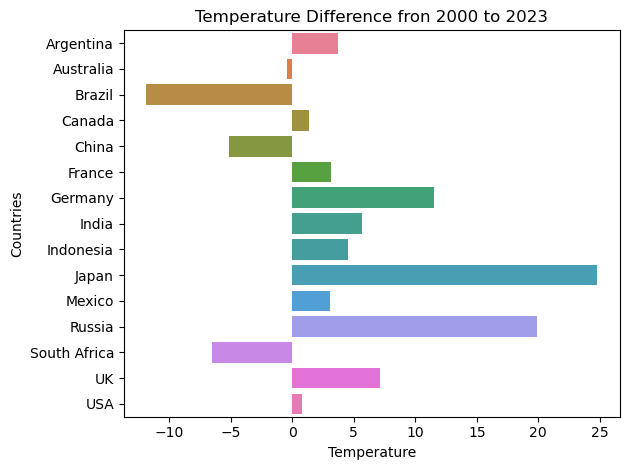

In [27]:
# average temperature increase per country 

 # 1. Difference in Avg Temperature from 2000 → 2024


df2_filtered = df2[df2["Year"].isin([2000,2023])]
temp_by_country = df2_filtered.pivot_table(index="Country",columns="Year",values="Avg Temperature (°C)",aggfunc="mean")
temp_by_country[2000] = temp_by_country[2000].fillna(0)
temp_by_country["Temperature Increase (°C)"] = temp_by_country[2023] - temp_by_country[2000]


sns.barplot(data=temp_by_country ,x="Temperature Increase (°C)",y="Country",hue="Country")
plt.title("Temperature Difference fron 2000 to 2023")
plt.xlabel("Temperature")
plt.ylabel("Countries")
plt.tight_layout()
plt.show()

## Temperature Change Trends (2000–2023)

- The analysis indicates that temperature changes from 2000 to 2023 are not uniform across countries.

- Countries such as Russia, Japan, and India,Germany exhibit noticeable warming, suggesting a stronger impact of climate change in these regions.

- In contrast, a few countries show slight cooling or minimal change, which may be influenced by regional climate patterns, oceanic effects, or short-term variability rather than long-term climate reversal.

- Overall, the results highlight that global warming manifests unevenly, with some regions warming at a faster rate than others.

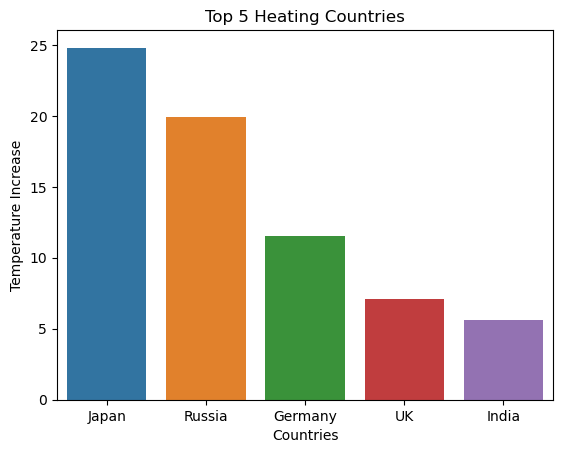

In [28]:
# 2. Fastest heating countries
top_5_heating_countries  = temp_by_country.sort_values("Temperature Increase (°C)",ascending=False)
top_5_heating_countries = top_5_heating_countries["Temperature Increase (°C)"].reset_index().head()

sns.barplot(data = top_5_heating_countries,x="Country",y="Temperature Increase (°C)",hue="Country")
plt.title("Top 5 Heating Countries")
plt.xlabel("Countries")
plt.ylabel("Temperature Increase")
plt.show()

### Fastest Heating Countries

- The fastest heating countries are those that show the largest increase in average temperature between 2000 and 2023.

- These countries are warming more rapidly than others, indicating higher vulnerability to climate change impacts such as heatwaves, droughts, and ecosystem stress.

- The observed rapid warming may be influenced by factors like geographical location, urbanization, industrial activity, and land-use changes.

### Key Insight

Countries with the highest temperature increase should be considered priority regions for climate mitigation and adaptation efforts.

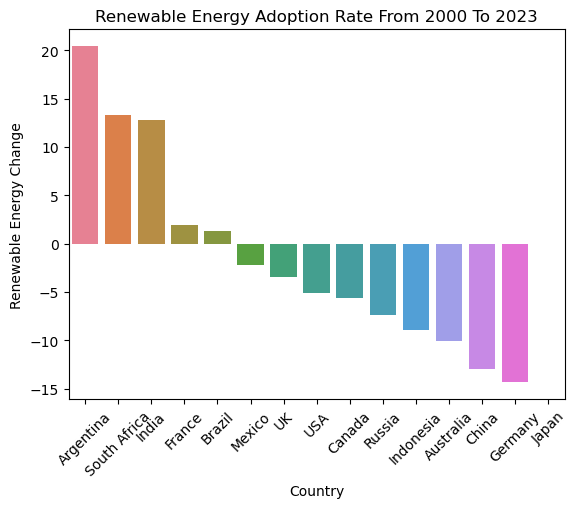

In [39]:
filtered_data = df[df["Year"].isin([2000,2023])]
renewable_energy_adopion_rate_table = filtered_data.pivot_table(index="Country",columns="Year",values="Renewable Energy (%)",aggfunc="mean")
renewable_energy_adopion_rate_table["Renewable Energy Change"] = renewable_energy_adopion_rate_table[2023]-renewable_energy_adopion_rate_table[2000]
sorted_data = renewable_energy_adopion_rate_table.sort_values("Renewable Energy Change",ascending=False)

sns.barplot(data=sorted_data ,x=sorted_data.index ,y="Renewable Energy Change" ,hue="Country")
plt.title("Renewable Energy Adoption Rate From 2000 To 2023")
plt.xticks(rotation=45)
plt.show()

### Renewable Energy Adoption Trends (2000–2023)

The analysis shows that renewable energy adoption has increased significantly in several countries between 2000 and 2023.

Countries such as Argentina, South Africa, and India demonstrate strong growth in renewable energy usage, indicating a gradual shift away from fossil fuel dependence.

However, some countries exhibit a decline or stagnation in adoption rates, which may be due to policy changes, economic constraints, or continued reliance on conventional energy sources.

### Key Insight

While many countries are progressing toward cleaner energy, the transition to renewables remains uneven, highlighting the need for sustained policy support and investment.

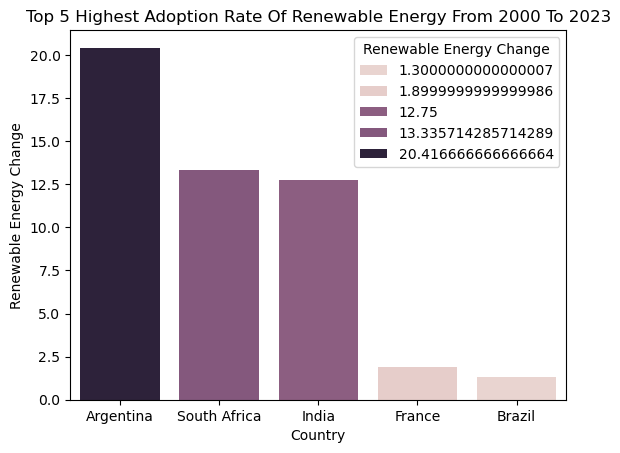

In [35]:
# Which countries are shifting fastest to clean energy?

fastest_adoption_rate_countries = sorted_data.head()

sns.barplot(data=fastest_adoption_rate_countries,x="Country",y="Renewable Energy Change",hue="Renewable Energy Change")
plt.title("Top 5 Highest Adoption Rate Of Renewable Energy From 2000 To 2023")
plt.show()


### Key Insights from the Analysis

- Argentina shows the highest increase in renewable energy adoption from 2000 to 2023, indicating strong progress toward sustainable energy usage.

- South Africa ranks second in renewable energy adoption growth, reflecting a significant shift toward cleaner energy sources over the same period.

### Overall Insight

- These trends suggest that Argentina and South Africa are leading the transition to renewable energy among the analyzed countries, while other nations are progressing at a slower pace

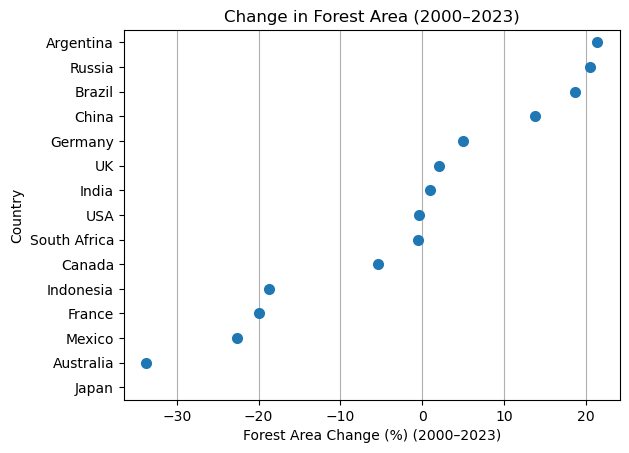

In [61]:
# Difference in Forest Area (%) over time
filtered_data = df[df["Year"].isin([2000,2023])]
forest_area_table = filtered_data.pivot_table(index="Country",columns="Year",values="Forest Area (%)",aggfunc="mean")
forest_area_table["Forest Area Change"] = forest_area_table[2023] - forest_area_table[2000]
sorted_data = forest_area_table.sort_values("Forest Area Change",ascending=False)

sns.stripplot(x=sorted_data["Forest Area Change"],y=sorted_data.index,orient="h",size=8)

plt.xlabel("Forest Area Change (%) (2000–2023)")
plt.ylabel("Country")
plt.title("Change in Forest Area (2000–2023)")
plt.grid(axis="x")
plt.show()

### From the above analysis 
 - Argentina has the most land covered in forest and this is critical indicator of biodiversity and carbon sequestration
 - Australia has the minimum land covered in forest indicator of  deforestation and habitat loss

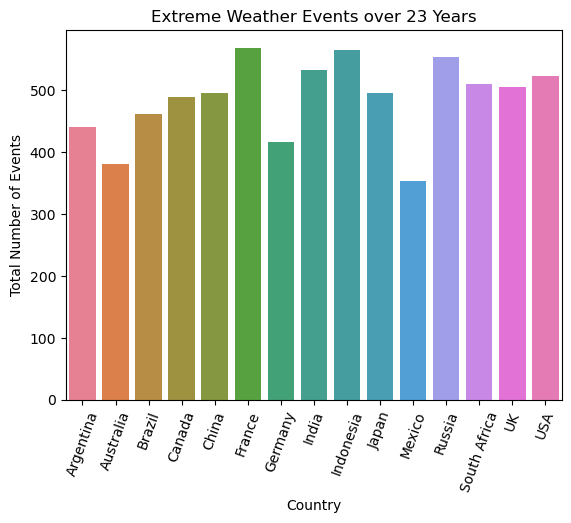

In [66]:
# Total number of events per country over 23 years

country_extreme_weather_events = df.groupby(["Country"],as_index=False)["Extreme Weather Events"].sum()
country_extreme_weather_events

sns.barplot(data=country_extreme_weather_events,x="Country",y="Extreme Weather Events",hue="Country")
plt.xticks(rotation=70)
plt.title("Extreme Weather Events over 23 Years")
plt.xlabel("Country")
plt.ylabel("Total Number of Events")
plt.show()

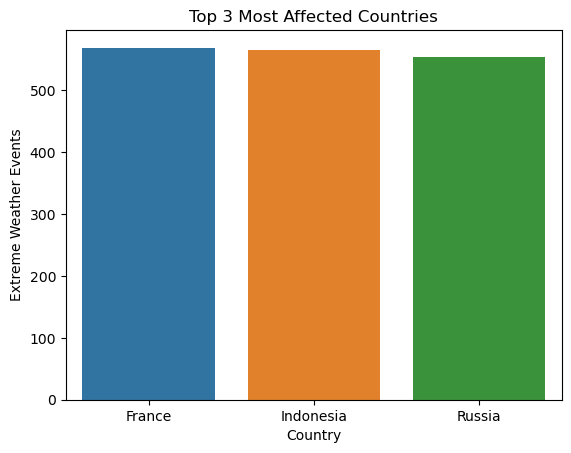

In [79]:
# Which countries are most affected by extreme events?

top_3_affected_countries = country_extreme_weather_events.sort_values("Extreme Weather Events",ascending=False).head(3)
top_3_affected_countries


sns.barplot(data=top_3_affected_countries,x="Country",y="Extreme Weather Events",hue="Country")
plt.title("Top 3 Most Affected Countries")
plt.xlabel("Country")
plt.ylabel("Extreme Weather Events")
plt.show()

### Key Insights from Extreme Weather Events Analysis

- The analysis indicates that France, Indonesia, and Russia are the most affected by extreme weather events among the countries studied.

- The high frequency of such events in these countries signals an intensifying impact of climate change, leading to more frequent natural disasters.

- This trend suggests increased climate vulnerability, emphasizing the need for stronger disaster preparedness and climate adaptation strategies.

### Key Takeaway

- Rising extreme weather events reflect the growing influence of climate change on regional weather patterns and disaster risks.

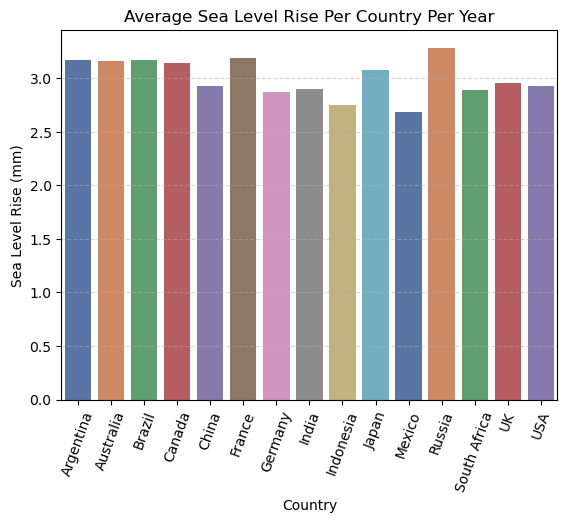

In [85]:
# Average sea level rise per country / per year

average_sea_level_per_country = df2.groupby("Country",as_index=False)["Sea Level Rise (mm)"].mean()
average_sea_level_per_country

sns.barplot(data=average_sea_level_per_country,x="Country",y="Sea Level Rise (mm)",hue="Country",palette="deep")
plt.xticks(rotation=70)
plt.title("Average Sea Level Rise Per Country Per Year")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

### From the above analysis
 - Countries with highest bars are likely more vulnerable to coastal damage, erosion, and climate impacts

 - Helps in policy planning, disaster preparedness, and adaptation strategies

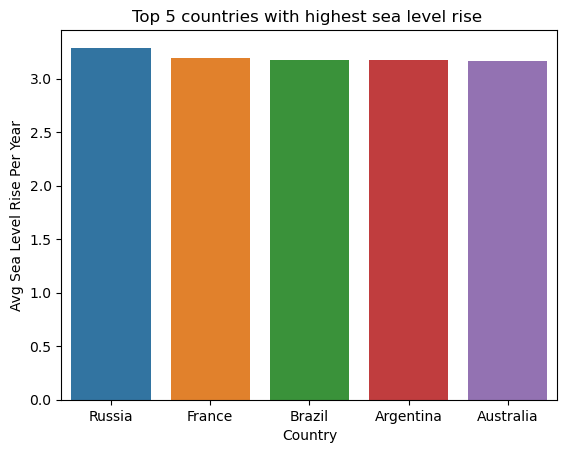

In [88]:
# Which coastal regions are at highest risk?
top_5_countries_avg_sea_level = average_sea_level_per_country.sort_values("Sea Level Rise (mm)",ascending=False).head(5)
top_5_countries_avg_sea_level

sns.barplot(data=top_5_countries_avg_sea_level,x="Country",y="Sea Level Rise (mm)" ,hue="Country")
plt.title("Top 5 countries with highest sea level rise ")
plt.xlabel("Country")
plt.ylabel("Avg Sea Level Rise Per Year")
plt.show()

### Insights:

- Countries at the top of the list are facing faster sea-level rise and are more vulnerable to coastal flooding.

- This metric helps in assessing risk and prioritizing adaptation strategies for affected regions.

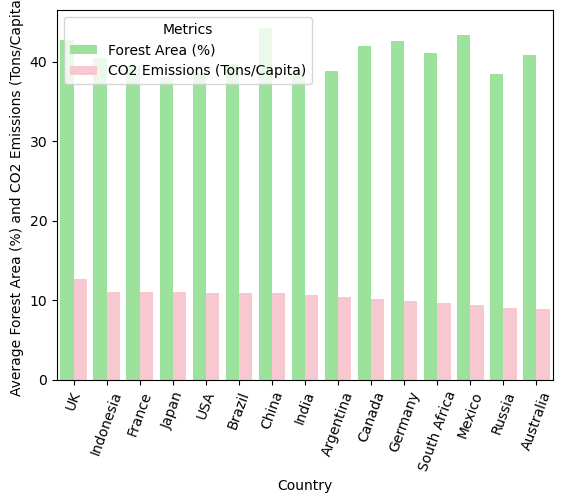

In [107]:
# Are countries with less forest area producing more CO2?
country_avg_forest_co2 = df2.groupby("Country",as_index=False).agg({
    "Forest Area (%)":"mean",
    "CO2 Emissions (Tons/Capita)":"mean"
})
country_avg_forest_co2 = country_avg_forest_co2.sort_values(["CO2 Emissions (Tons/Capita)","Forest Area (%)"],ascending=False)
melted_data = country_avg_forest_co2.melt(id_vars="Country",value_vars=["Forest Area (%)","CO2 Emissions (Tons/Capita)"],var_name="Category",value_name="Avg Data")

sns.barplot(data=melted_data,x="Country",y="Avg Data",hue="Category",palette=["lightgreen","pink"])
plt.xticks(rotation=70)
plt.legend(title="Metrics", loc="upper left")
plt.ylabel("Average Forest Area (%) and CO2 Emissions (Tons/Capita)")
plt.show()


#### Relationship Between Forest Area and CO2 Emissions

 - The analysis shows that countries with lower average forest cover tend to have higher average CO2 emissions per capita. This indicates that deforestation is closely linked to increased carbon emissions, emphasizing the importance of preserving forested areas for climate mitigation.

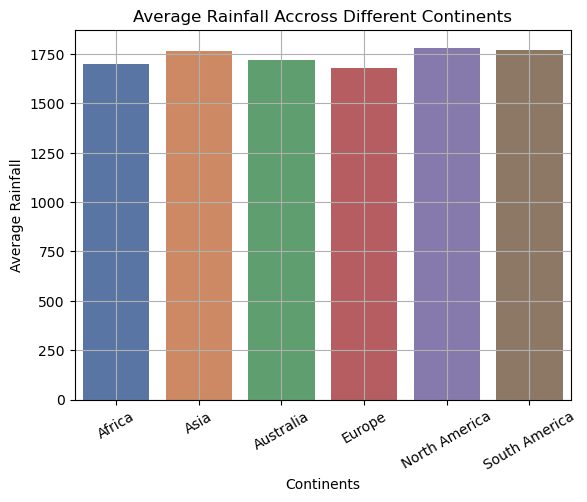

In [122]:
# How does rainfall vary across countries ?

def continent(country):
    if country in ["India","China","Japan","Indonesia"]:
        return "Asia"
    elif country in ["France","Germany","UK"]:
        return "Europe"
    elif country in ["Brazil","Argentina","Mexico"]:
        return "South America"
    elif country in ["USA","Canada"]:
        return "North America"
    elif country in ["South Africa"]:
        return "Africa"
    elif country in ["Australia"]:
        return "Australia"

df2["Continent"] =  df2["Country"].apply(continent)
rainfall_variation = df2.groupby("Continent",as_index=False)["Rainfall (mm)"].mean()
sns.barplot(data=rainfall_variation,x="Continent",y="Rainfall (mm)",hue="Continent",palette="deep")
plt.title("Average Rainfall Accross Different Continents")
plt.ylabel("Average Rainfall")
plt.xlabel("Continents")
plt.xticks(rotation=30)
plt.grid()
plt.show()

### Key Insight: Rainfall by Continent

The analysis shows that Asia, South America, and North America receive the highest average rainfall among all continents in the dataset. This indicates that these regions experience comparatively wetter climatic conditions, which have significant implications for agriculture, water resources, and ecosystem sustainability.

# Overall Insights from the Climate Change Analysis 

The analysis reveals a clear warming trend between 2000 and 2023, with countries such as Russia, Japan, and India heating at a faster rate, while a few regions show temporary cooling or slower change.

Renewable energy adoption has increased over time, led by countries like Argentina and South Africa, indicating a gradual shift away from fossil fuel dependence. However, this transition remains uneven across countries.

Countries with lower forest cover tend to exhibit higher CO₂ emissions, highlighting the critical role of forests in carbon absorption and climate regulation.

The study finds that extreme weather events are becoming more frequent, with France, Indonesia, and Russia being the most affected, signaling increased climate-related risks.

Sea level rise patterns indicate that certain countries experience higher average annual increases, posing long-term risks to coastal ecosystems and populations.

Continental-level analysis shows that Asia, North America, and South America receive the highest average rainfall, reflecting diverse climate dynamics and vulnerability to flooding.